In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from prediction_helpers import *

In [3]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')
embeddings

,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,ACG,...,data_Turco_expression_11808,data_Turco_expression_16247,data_Turco_expression_16248,data_Turco_expression_16249,data_Turco_expression_16250,data_Turco_expression_16683,data_Turco_expression_16684,data_Turco_expression_16685,data_Turco_expression_21888,data_Turco_expression_21932
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,0.011774,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,0.000000,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,0.013953,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,0.010101,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,0.007722,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,0.036697,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,0.005348,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,0.013605,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249


In [4]:
pca_linear_regression = Pipeline([
    ('pca', PCA(n_components=0.9)), 
    ('linear_regression', LinearRegression())
])
pca_linear_regression.name = 'PCA + Linear Regression'

predictive_models_ExE = [ 
    pca_linear_regression,
    Lasso(alpha=0.0001, max_iter=10000),
    Ridge(alpha=5, max_iter=10000),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_NxN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005, max_iter=10000),
    Ridge(alpha=10),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_ExN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005, max_iter=10000),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

random.seed(35)
proportion = 0.01

## ExE


Model: Pipeline
Average R²:   -0.0397
Average RMSE: 0.0897

Model: Lasso
Average R²:   -0.6868
Average RMSE: 0.1138

Model: Ridge
Average R²:   -0.4315
Average RMSE: 0.1042

Model: RandomForestRegressor
Average R²:   -0.1459
Average RMSE: 0.0939


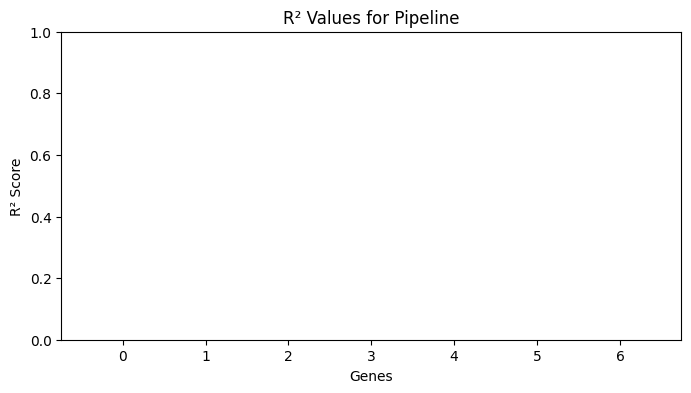

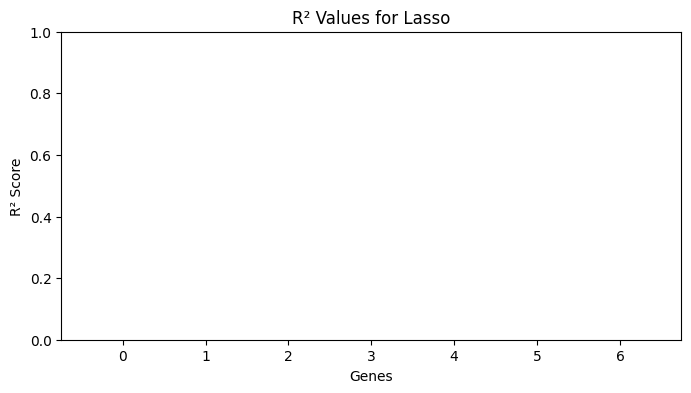

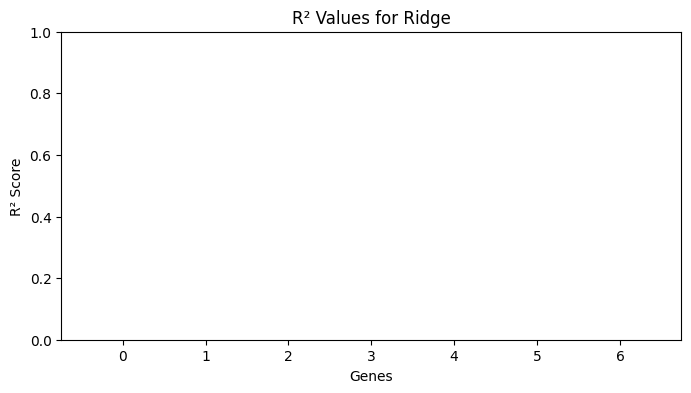

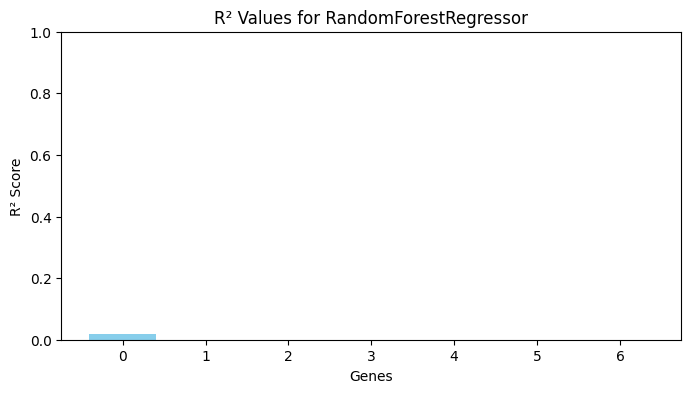

In [5]:
results_ExE = iterate_over_proportion_only_embeddings(ExE, embeddings, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Model: Pipeline
Average R²:   -0.0013
Average RMSE: 0.0410

Model: Lasso
Average R²:   -0.1513
Average RMSE: 0.0442

Model: Ridge
Average R²:   -0.2875
Average RMSE: 0.0463

Model: RandomForestRegressor
Average R²:   -0.1771
Average RMSE: 0.0445


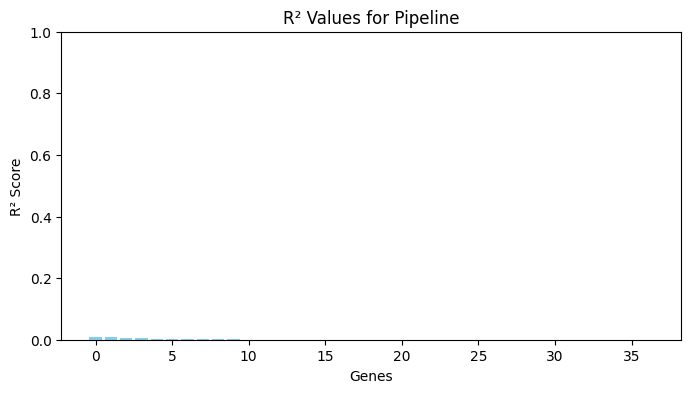

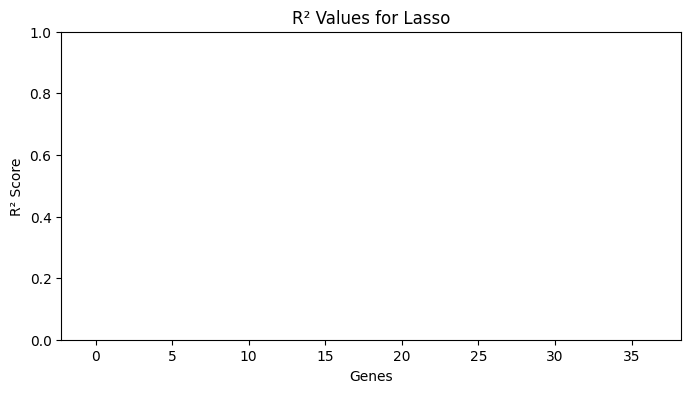

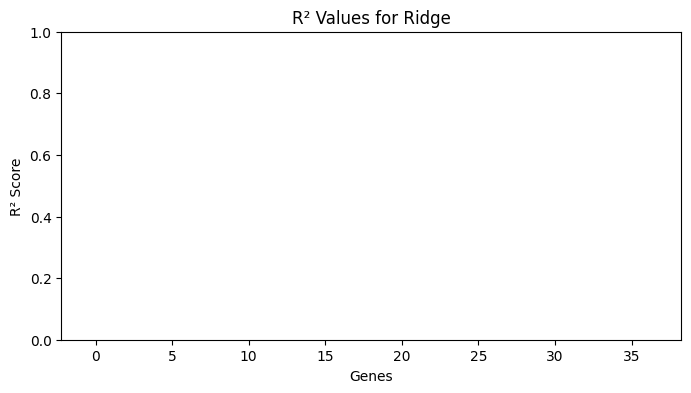

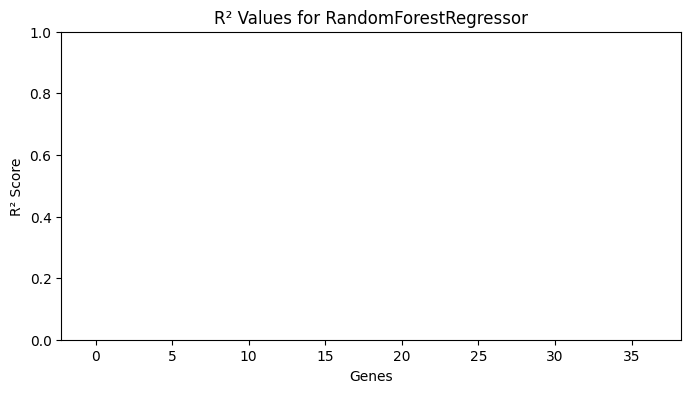

In [6]:
results_NxN = iterate_over_proportion_only_embeddings(NxN, embeddings, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Model: Pipeline
Average R²:   -0.0022
Average RMSE: 0.0532

Model: Lasso
Average R²:   -0.5734
Average RMSE: 0.0668

Model: Ridge
Average R²:   -0.6452
Average RMSE: 0.0675

Model: RandomForestRegressor
Average R²:   -0.2533
Average RMSE: 0.0586


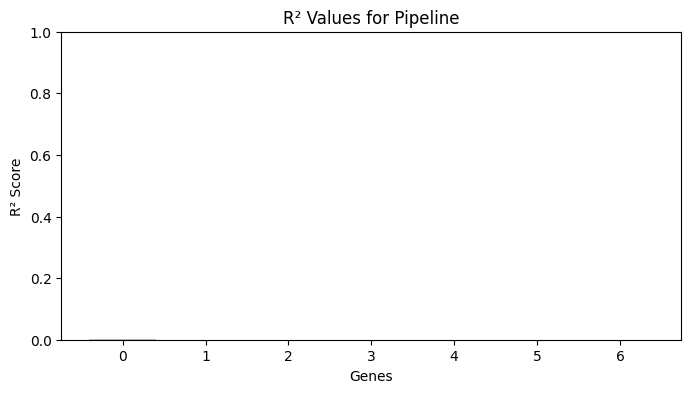

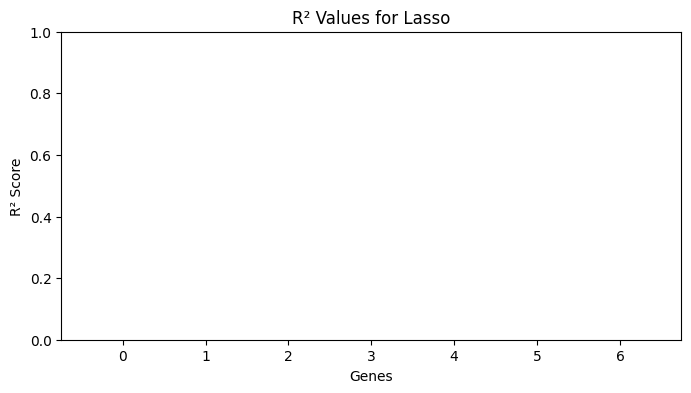

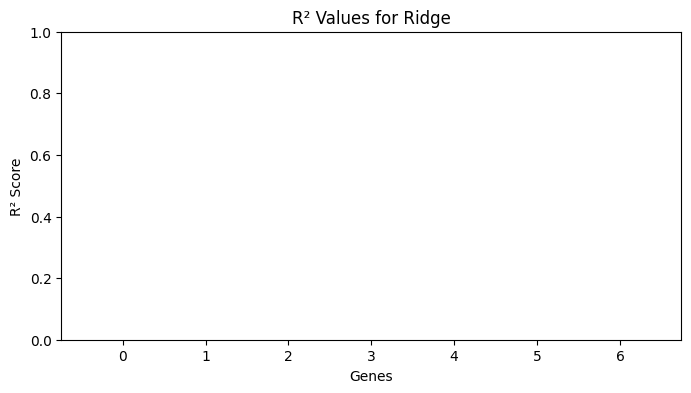

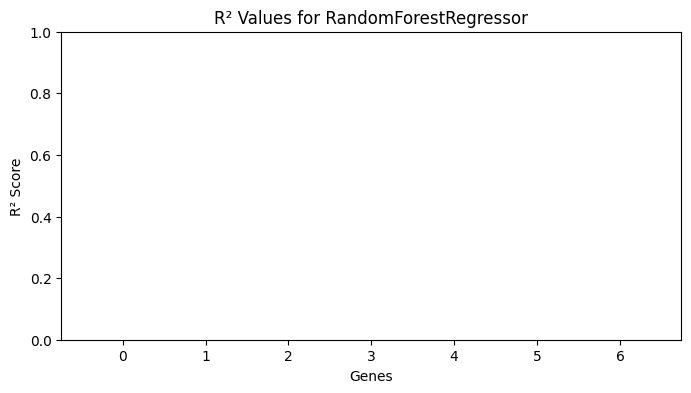

In [7]:
results_ExN = iterate_over_proportion_only_embeddings(ExN, embeddings, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [8]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-05-13 22:01:13
